# Classification: Ensemble

## Data import

In [1]:
import pandas as pd
df = pd.read_csv('diabetes.csv')

In [2]:
df

,timespreg,gluctol,diaspb,triceps,insulin,massindex,pedigree,age,target
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


target
0    500
1    268
dtype: int64


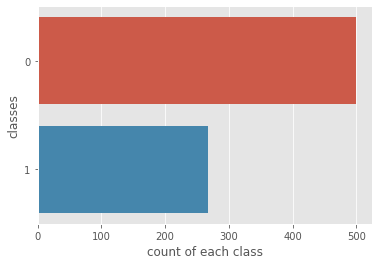

In [3]:
#Print class freq. through pandas 
print(df.groupby('target').size())

#some imports to plot 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

#Visualize Class Counts
sns.countplot(y=df.target ,data=df)
plt.xlabel("count of each class")
plt.ylabel("classes")
plt.show()

In [4]:
#gives information about the data types,columns, null value counts, memory usage etc
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timespreg  768 non-null    int64  
 1   gluctol    768 non-null    int64  
 2   diaspb     768 non-null    int64  
 3   triceps    768 non-null    int64  
 4   insulin    768 non-null    int64  
 5   massindex  768 non-null    float64
 6   pedigree   768 non-null    float64
 7   age        768 non-null    int64  
 8   target     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Data Preparation

### Separate Train/Test sets


In [5]:
#Separate X and y (explanatory variables and target variable)
X = df.iloc[:,0:-1]
y = df.iloc[:,-1] #[-1]]

#X.head()
#y.head()

In [6]:
from sklearn.model_selection import train_test_split

#SPLIT DATA INTO TRAIN AND TEST SET
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size =0.30, #by default is 75%-25%
                                                    #shuffle is set True by default,
                                                    stratify=y, #preserve target propotions 
                                                    random_state= 123) #fix random seed for replicability

print(X_train.shape, X_test.shape)

(537, 8) (231, 8)


# Random Forest

In [7]:
from sklearn.ensemble import RandomForestClassifier

rand_forest = RandomForestClassifier(n_estimators=30, criterion='entropy', max_depth=6, min_samples_split=4, min_samples_leaf=2)
#rand_forest = RandomForestClassifier()
rand_forest.fit(X_train, y_train)

y_pred = rand_forest.predict(X_test)



In [8]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.88      0.82       150
           1       0.70      0.53      0.61        81

    accuracy                           0.76       231
   macro avg       0.74      0.71      0.72       231
weighted avg       0.75      0.76      0.75       231



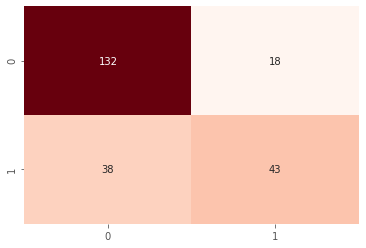

In [9]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Reds", cbar=False);

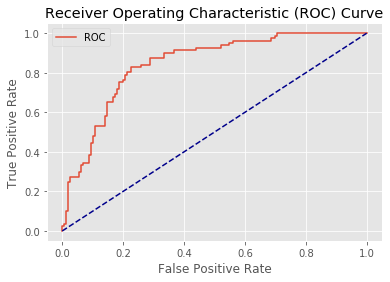

AUC: 0.84


In [10]:
# ROC curve

from sklearn import metrics

y_probs = rand_forest.predict_proba(X_test) #predict_proba gives the probabilities for the target (0 and 1 in your case) 

fpr, tpr, thresholds=metrics.roc_curve(y_test,  y_probs[:,1])

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

auc = metrics.roc_auc_score(y_test, y_probs[:,1])
print('AUC: %.2f' % auc)

## Adaboost

In [15]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

adaboost = AdaBoostClassifier(n_estimators=1000, base_estimator=DecisionTreeClassifier(max_depth=10))
adaboost.fit(X_train, y_train)

y_pred = adaboost.predict(X_test)

y_pred_train = adaboost.predict(X_test)
print("f1_score: ", metrics.f1_score(y_test, y_pred))

f1_score:  0.6


In [16]:
from sklearn.model_selection import GridSearchCV

classifier= AdaBoostClassifier()
parameters = {'n_estimators' : [100, 500, 1000, 2000],
    'learning_rate' : [0.0001, 0.01, 0.1, 1.0]}

gs = GridSearchCV(classifier, parameters, cv=3, scoring = 'f1', verbose=10, n_jobs=-1, refit=True)

gs.fit(X_train,y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done  38 out of  48 | elapsed:   10.0s remaining:    2.6s
[Parallel(n_jobs=-1)]: Done  43 out of  48 | elapsed:   13.3s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:   16.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:   16.3s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=None),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': [0.0001, 0.01, 0.1, 1.0],
                         'n_estimators': [100, 500, 1000, 2000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=10)

In [20]:
#summarize the results of your GRIDSEARCH
print('***GRIDSEARCH RESULTS***')

print("Best score: %f using %s" % (gs.best_score_, gs.best_params_))
means = gs.cv_results_['mean_test_score']
stds = gs.cv_results_['std_test_score']
params = gs.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

***GRIDSEARCH RESULTS***
Best score: 0.593243 using {'learning_rate': 0.01, 'n_estimators': 2000}
0.000000 (0.000000) with: {'learning_rate': 0.0001, 'n_estimators': 100}
0.000000 (0.000000) with: {'learning_rate': 0.0001, 'n_estimators': 500}
0.000000 (0.000000) with: {'learning_rate': 0.0001, 'n_estimators': 1000}
0.000000 (0.000000) with: {'learning_rate': 0.0001, 'n_estimators': 2000}
0.545828 (0.062566) with: {'learning_rate': 0.01, 'n_estimators': 100}
0.568947 (0.056517) with: {'learning_rate': 0.01, 'n_estimators': 500}
0.578275 (0.040574) with: {'learning_rate': 0.01, 'n_estimators': 1000}
0.593243 (0.015724) with: {'learning_rate': 0.01, 'n_estimators': 2000}
0.575246 (0.048527) with: {'learning_rate': 0.1, 'n_estimators': 100}
0.584054 (0.029187) with: {'learning_rate': 0.1, 'n_estimators': 500}
0.585618 (0.017245) with: {'learning_rate': 0.1, 'n_estimators': 1000}
0.583357 (0.022328) with: {'learning_rate': 0.1, 'n_estimators': 2000}
0.544383 (0.054134) with: {'learning_rat

In [21]:
#TEST ON YOUR TEST SET 
best_model = gs.best_estimator_
y_pred = best_model.predict(X_test)

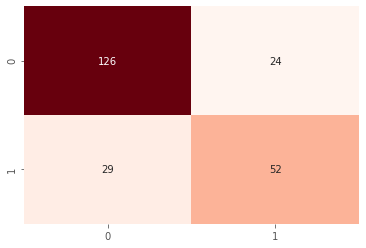

In [22]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Reds", cbar=False);

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

In [12]:
y_pred_train = adaboost.predict(X_train)
print("f1_score: ", metrics.f1_score(y_train, y_pred_train))

f1_score:  1.0


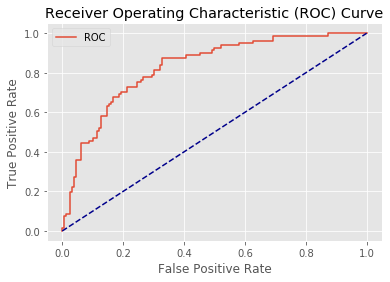

AUC: 0.83


In [33]:
adaboost = AdaBoostClassifier(n_estimators=2000, learning_rate=0.1)

adaboost.fit(X_train,y_train)

y_probs = adaboost.predict_proba(X_test) #predict_proba gives the probabilities for the target (0 and 1 in your case) 

fpr, tpr, thresholds=metrics.roc_curve(y_test,  y_probs[:,1])

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

auc = metrics.roc_auc_score(y_test, y_probs[:,1])
print('AUC: %.2f' % auc)

## GradientBoost

In [24]:
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import GridSearchCV

classifier= GradientBoostingClassifier()
parameters = {'n_estimators' : [100, 500, 1000, 2000],
    'learning_rate' : [0.0001, 0.01, 0.1, 1.0]}

gs = GridSearchCV(classifier, parameters, cv=3, scoring = 'f1', verbose=10, n_jobs=-1, refit=True)

gs.fit(X_train,y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1346s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  19 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done  28 out of  48 | elapsed:    3.7s remaining:    2.7s
[Parallel(n_jobs=-1)]: Done  38 out of  48 | elapsed:    5.1s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:    6.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:    6.0s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
         

In [25]:
#summarize the results of your GRIDSEARCH
print('***GRIDSEARCH RESULTS***')

print("Best score: %f using %s" % (gs.best_score_, gs.best_params_))
means = gs.cv_results_['mean_test_score']
stds = gs.cv_results_['std_test_score']
params = gs.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

***GRIDSEARCH RESULTS***
Best score: 0.593243 using {'learning_rate': 0.01, 'n_estimators': 2000}
0.000000 (0.000000) with: {'learning_rate': 0.0001, 'n_estimators': 100}
0.000000 (0.000000) with: {'learning_rate': 0.0001, 'n_estimators': 500}
0.000000 (0.000000) with: {'learning_rate': 0.0001, 'n_estimators': 1000}
0.000000 (0.000000) with: {'learning_rate': 0.0001, 'n_estimators': 2000}
0.545828 (0.062566) with: {'learning_rate': 0.01, 'n_estimators': 100}
0.568947 (0.056517) with: {'learning_rate': 0.01, 'n_estimators': 500}
0.578275 (0.040574) with: {'learning_rate': 0.01, 'n_estimators': 1000}
0.593243 (0.015724) with: {'learning_rate': 0.01, 'n_estimators': 2000}
0.581260 (0.055729) with: {'learning_rate': 0.1, 'n_estimators': 100}
0.582449 (0.031154) with: {'learning_rate': 0.1, 'n_estimators': 500}
0.578110 (0.011448) with: {'learning_rate': 0.1, 'n_estimators': 1000}
0.582860 (0.018021) with: {'learning_rate': 0.1, 'n_estimators': 2000}
0.548908 (0.044442) with: {'learning_rat

In [26]:
#TEST ON YOUR TEST SET 
best_model = gs.best_estimator_
y_pred = best_model.predict(X_test)

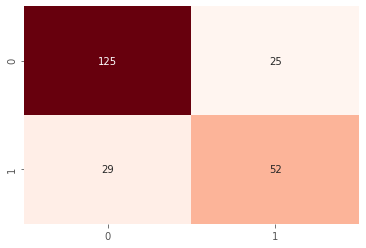

In [27]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Reds", cbar=False);

In [28]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       150
           1       0.68      0.64      0.66        81

    accuracy                           0.77       231
   macro avg       0.74      0.74      0.74       231
weighted avg       0.76      0.77      0.76       231



In [29]:
y_pred_train = adaboost.predict(X_train)
print("f1_score: ", metrics.f1_score(y_train, y_pred_train))

f1_score:  1.0


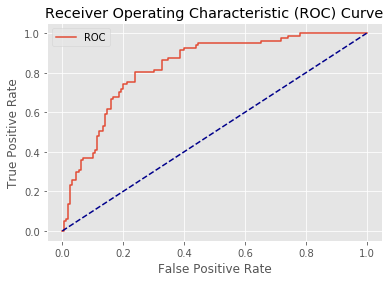

AUC: 0.83


In [36]:
gradientboost = GradientBoostingClassifier(n_estimators=2000, learning_rate=0.01)

gradientboost.fit(X_train,y_train)

y_probs = gradientboost.predict_proba(X_test) #predict_proba gives the probabilities for the target (0 and 1 in your case) 

fpr, tpr, thresholds=metrics.roc_curve(y_test,  y_probs[:,1])

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

auc = metrics.roc_auc_score(y_test, y_probs[:,1])
print('AUC: %.2f' % auc)